# Introduction to the Project
In today’s competitive marketplace, losing customers is costlier than gaining new ones. “Churntastic Customer Retention” is a machine-learning project designed to predict which customers are likely to leave by using historical data. By identifying these high-risk customers early, businesses can take proactive steps—like targeted communications—to retain them, thereby boosting customer lifetime value and driving sustainable growth.

The goal is to enable data-driven insights into why customers churn and act as an early alert system for timely, personalized retention efforts.










# 1. Framing the Problem
The problem is framed as a binary classification task: given a customer's demographic and transactional information, predict whether they will churn (exit) or not. The target variable is

`Exited`, where `1` indicates churn and `0` indicates no churn.

Key questions to address:

*  Can we accurately predict which customers are likely to churn?

*  What are the most influential factors contributing to customer churn?

*  How can these predictions be used to implement effective retention strategies?

# 2.Gathering Data
The dataset for this project is provided as
DATA_SET(Churn_prediction).csv. The dataset for this project was obtained from Kaggle, a popular platform for data science competitions and datasets. This publicly available dataset provides a rich source of customer information crucial for our churn prediction analysis.

# Importing Libraries:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.metrics import accuracy_score

# Loading Dataset:

In [ ]:
df = pd.read_csv('/content/DATA_SET(Churn_prediction).csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


# Dataset Overview:
The dataset contains the following columns:

* `RowNumber`: Row number (identifier)

* `CustomerId`: Unique identifier for each customer

* `Surname`: Customer's surname

* `CreditScore`: Customer's credit score

* `Geography`: Customer's geographical location (France, Spain, Germany)

* `Gender`: Customer's gender

* `Age`: Customer's age

* `Tenure`: Number of years the customer has been with the bank

* `Balance`: Customer's account balance

* `NumOfProducts`: Number of products the customer has with the bank

* `HasCrCard`: Whether the customer has a credit card (1 = Yes, 0 = No)

* `IsActiveMember`: Whether the customer is an active member (1 = Yes, 0 = No)

* `EstimatedSalary`: Estimated salary of the customer

* `Exited`: Target variable (1 = Churned, 0 = Not churned)

# 3. Basic Data Preprocessing (Initial Cleaning)
Initial Inspection
- 1. How big the data?
- 2. What is the data type of columns?
- 3. Are there any missing values?
- 4. Are there duplicate values?



In [ ]:
# 1. How big the data?
df.shape

(10002, 14)

This dataset has 10002 rows and 14 columns.

In [ ]:
# 2. How does the data looks like?
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


Handle Obvious Issues

Missing values:


In [ ]:
# 3. Are their any missing values?
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,1
Gender,0
Age,1
Tenure,0
Balance,0
NumOfProducts,0


The output of the df.isnull().sum() command shows the number of missing values in each column. From the output you can see:

* `Geography`: `1` missing value
* `Age`: `1` missing value
* `HasCrCard`: `1` missing value
* `IsActiveMember`: `1` missing value
Since there are only a few missing values, one way to handle them is to remove the rows that contain them. Here is the code to do that:

In [ ]:
df.dropna(inplace=True)
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [ ]:
 # 4. Are there duplicate values?
df.duplicated().sum()

np.int64(2)

There are two duplicate rows.

In [ ]:
# removing duplicate rows
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

# Remove Irrelevant Columns:


Dropping the `RowNumber`, `CustomerId`, and `Surname` columns as they are not relevant for the churn prediction model.

In [ ]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9996 entries, 0 to 10000
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      9996 non-null   int64  
 1   Geography        9996 non-null   object 
 2   Gender           9996 non-null   object 
 3   Age              9996 non-null   float64
 4   Tenure           9996 non-null   int64  
 5   Balance          9996 non-null   float64
 6   NumOfProducts    9996 non-null   int64  
 7   HasCrCard        9996 non-null   float64
 8   IsActiveMember   9996 non-null   float64
 9   EstimatedSalary  9996 non-null   float64
 10  Exited           9996 non-null   int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 937.1+ KB


Basic Data Type Correction and Dataset Sliming:


In [ ]:
df['Age'] = df['Age'].astype('int32')
df['Tenure'] = df['Tenure'].astype('int32')
df['NumOfProducts'] = df['NumOfProducts'].astype('int32')
df['HasCrCard'] = df['HasCrCard'].astype('int32')
df['IsActiveMember'] = df['IsActiveMember'].astype('int32')
df['Exited'] = df['Exited'].astype('int32')
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 9996 entries, 0 to 10000
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      9996 non-null   int64  
 1   Geography        9996 non-null   object 
 2   Gender           9996 non-null   object 
 3   Age              9996 non-null   int32  
 4   Tenure           9996 non-null   int32  
 5   Balance          9996 non-null   float64
 6   NumOfProducts    9996 non-null   int32  
 7   HasCrCard        9996 non-null   int32  
 8   IsActiveMember   9996 non-null   int32  
 9   EstimatedSalary  9996 non-null   float64
 10  Exited           9996 non-null   int32  
dtypes: float64(2), int32(6), int64(1), object(2)
memory usage: 702.8+ KB


The dataset memory usage has been reduced from 1.1 MB to 702.8+ KB after correcting data types and dropping irrelevant columns.

In [ ]:
customer_data = df
customer_data.shape

(9996, 11)

After basic data preprocessing, the dataset now has 9996 rows and 11 columns.

# 4.Exploratory Data Analysis (EDA)
Goal: Understand data distributions, relationships, and patterns.



# Descriptive Statistics

In [ ]:
# Numerical features:
numerical_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
print("Descriptive Statistics for Numerical Features:")
print(customer_data[numerical_cols].describe())

Descriptive Statistics for Numerical Features:
       CreditScore          Age       Tenure        Balance  NumOfProducts  \
count  9996.000000  9996.000000  9996.000000    9996.000000    9996.000000   
mean    650.503301    38.920968     5.013305   76476.263216       1.530212   
std      96.624668    10.488439     2.892353   62397.118820       0.581684   
min     350.000000    18.000000     0.000000       0.000000       1.000000   
25%     584.000000    32.000000     3.000000       0.000000       1.000000   
50%     652.000000    37.000000     5.000000   97173.290000       1.000000   
75%     717.250000    44.000000     7.250000  127639.372500       2.000000   
max     850.000000    92.000000    10.000000  250898.090000       4.000000   

       EstimatedSalary  
count      9996.000000  
mean     100106.701248  
std       57513.314398  
min          11.580000  
25%       51002.110000  
50%      100238.110000  
75%      149400.107500  
max      199992.480000  


Looking at the descriptive statistics for the numerical columns, we can see the range, mean, and standard deviation for each. For example, the Age column has a wide range from 18 to 92 with a mean around 39, while Balance and EstimatedSalary show large standard deviations, indicating significant variability in these values across customers

In [ ]:
# Categorical features:
categorical_cols = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

print("Value counts for Categorical Features:")
for col in categorical_cols:
    print(f"\nValue counts for {col}:")
    print(customer_data[col].value_counts())

Value counts for Categorical Features:

Value counts for Geography:
Geography
France     5011
Germany    2509
Spain      2476
Name: count, dtype: int64

Value counts for Gender:
Gender
Male      5454
Female    4542
Name: count, dtype: int64

Value counts for HasCrCard:
HasCrCard
1    7052
0    2944
Name: count, dtype: int64

Value counts for IsActiveMember:
IsActiveMember
1    5147
0    4849
Name: count, dtype: int64


Analyzing the value counts for the categorical features provides insights into the distribution of customers within each category. For example, the `Geography` column highlights that the majority of customers reside in France, followed by Germany and Spain.

# Univariate Analysis



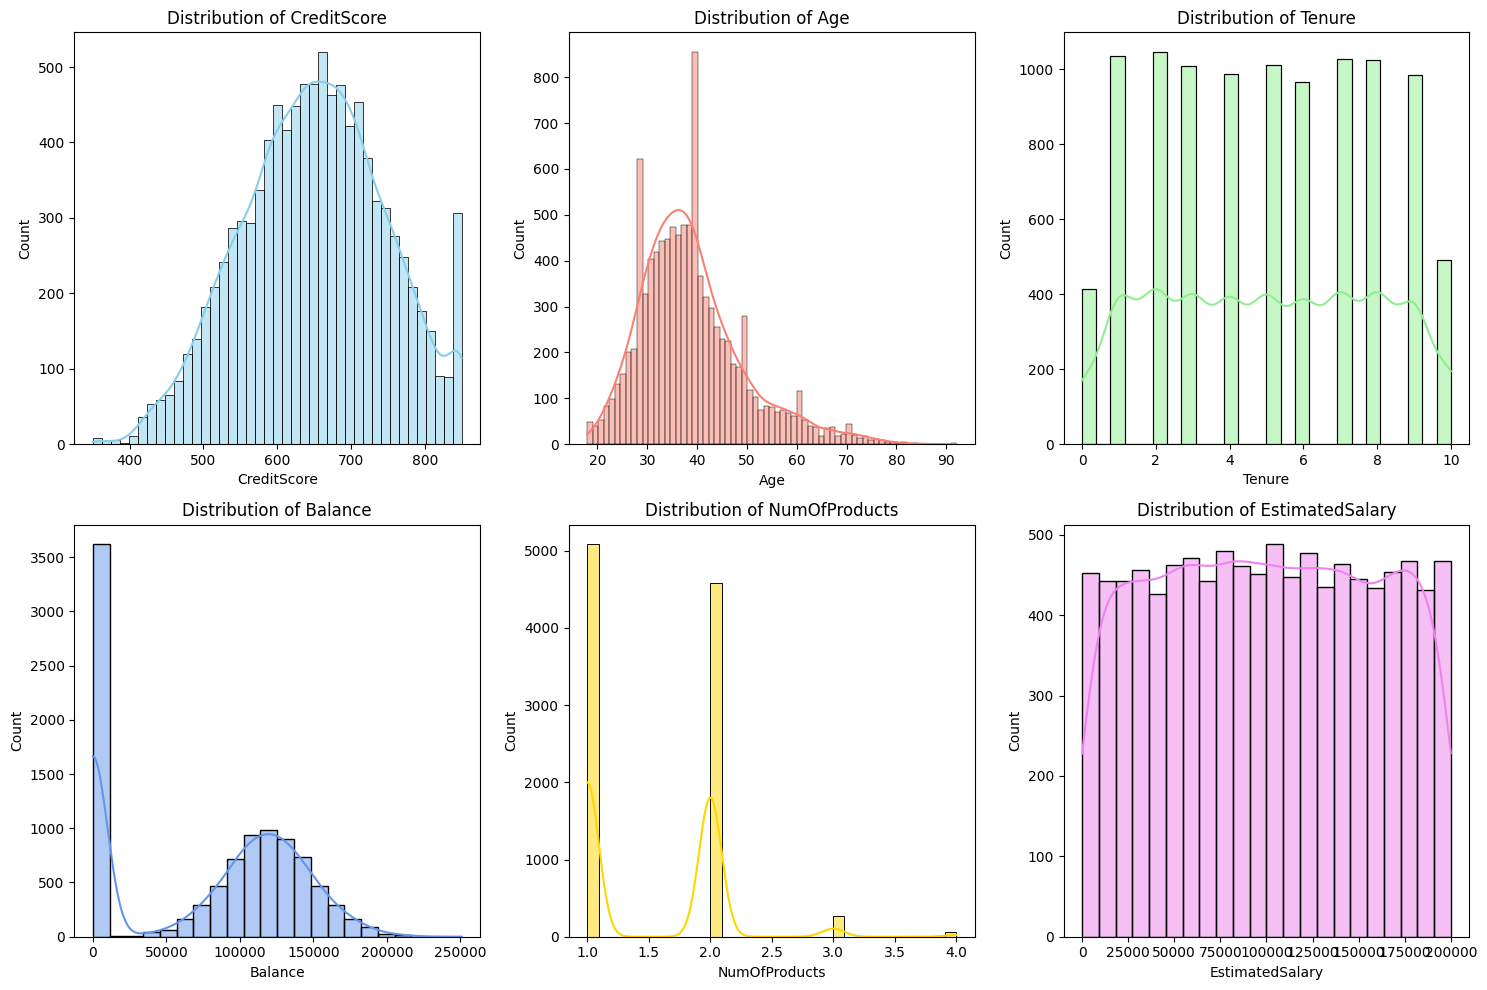

In [ ]:
# Numerical features:
numerical_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
colors = ['skyblue', 'salmon', 'lightgreen', 'cornflowerblue', 'gold', 'violet']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.histplot(customer_data[col], kde=True, color=colors[i])
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

Based on the histograms:

* `CreditScore` and `EstimatedSalary` appear to have relatively uniform distributions.
* `Age` seems right-skewed, with a peak in younger to middle-aged customers.
* `Balance` shows a bimodal distribution, with a large peak at zero (likely customers with no balance) and another distribution for customers with balances.
* `Tenure` and `NumOfProducts` might show some variation in counts across their ranges.


/tmp/ipython-input-123-3613517306.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customer_data, x=col, palette=[palette[i]])
/tmp/ipython-input-123-3613517306.py:9: UserWarning: 
The palette list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=customer_data, x=col, palette=[palette[i]])
/tmp/ipython-input-123-3613517306.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customer_data, x=col, palette=[palette[i]])
/tmp/ipython-input-123-3613517306.py:9: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=cust

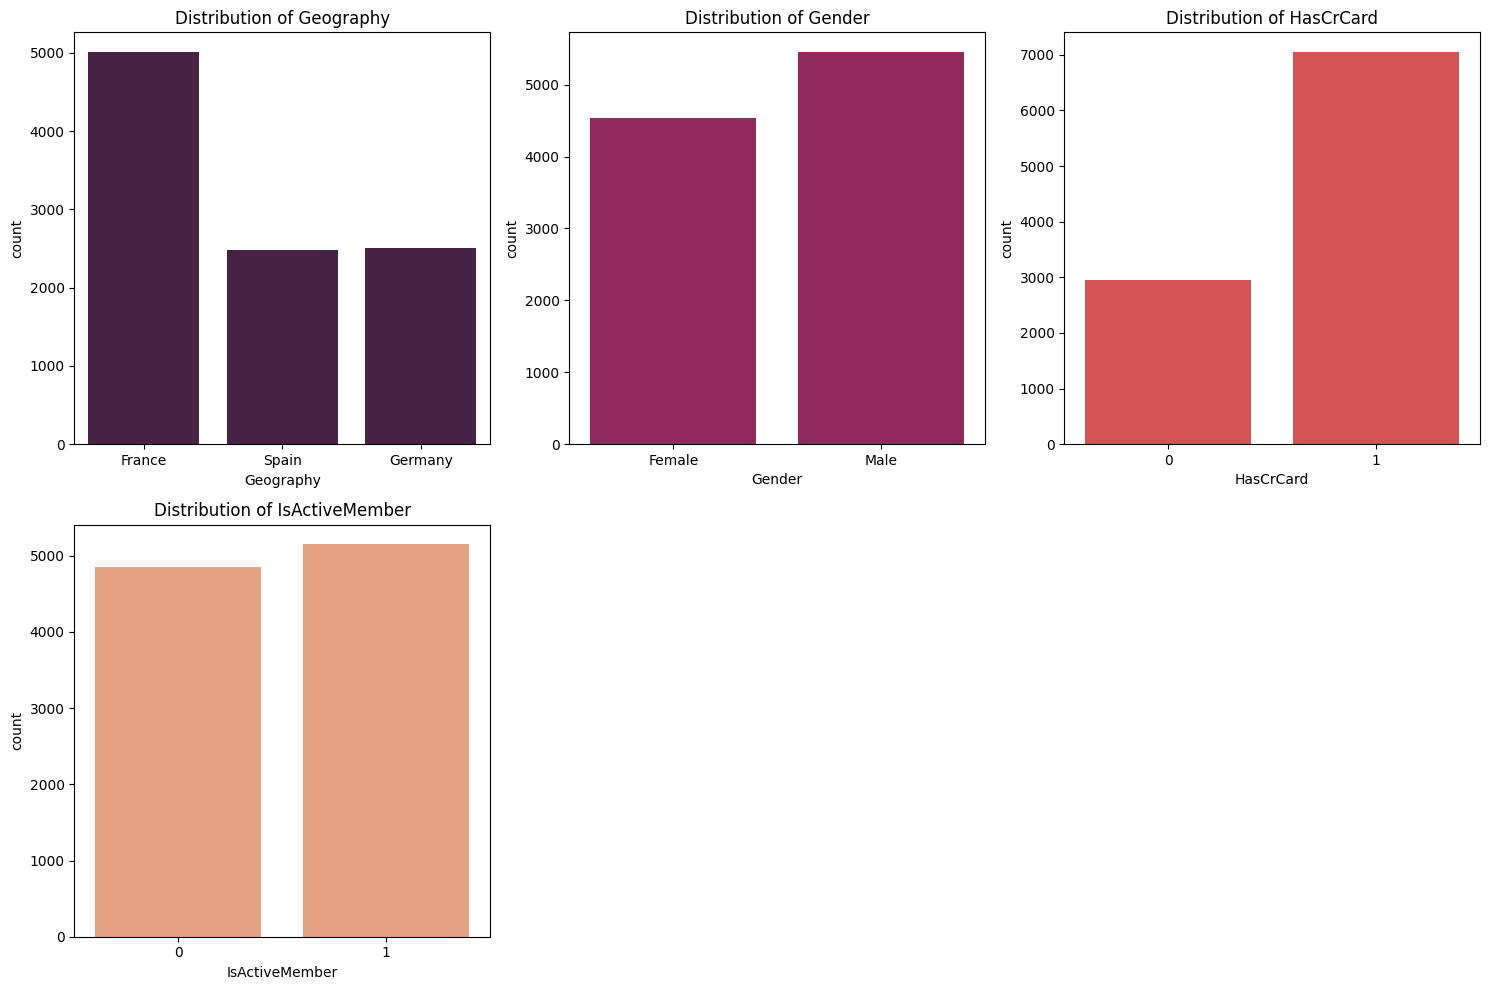

In [ ]:
# Categorical features:
categorical_cols = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']
# Using a darker color palette
palette = sns.color_palette("rocket", len(categorical_cols))

plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols):
    plt.subplot(2, 3, i + 1)
    sns.countplot(data=customer_data, x=col, palette=[palette[i]])
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

The `Geography` plot shows a strong geographical bias, with France having the most customers. `Gender` is relatively balanced, though slightly more male customers. `HasCrCard` indicates that most customers have a credit card. `IsActiveMember` is also fairly balanced between active and inactive members.

# Bivariate Analysis


/tmp/ipython-input-124-2791005415.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=customer_data, x='Exited', y=col, palette=[palette[i]])
/tmp/ipython-input-124-2791005415.py:12: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=customer_data, x='Exited', y=col, palette=[palette[i]])
/tmp/ipython-input-124-2791005415.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=customer_data, x='Exited', y=col, palette=[palette[i]])
/tmp/ipython-input-124-2791005415.py:12: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretab

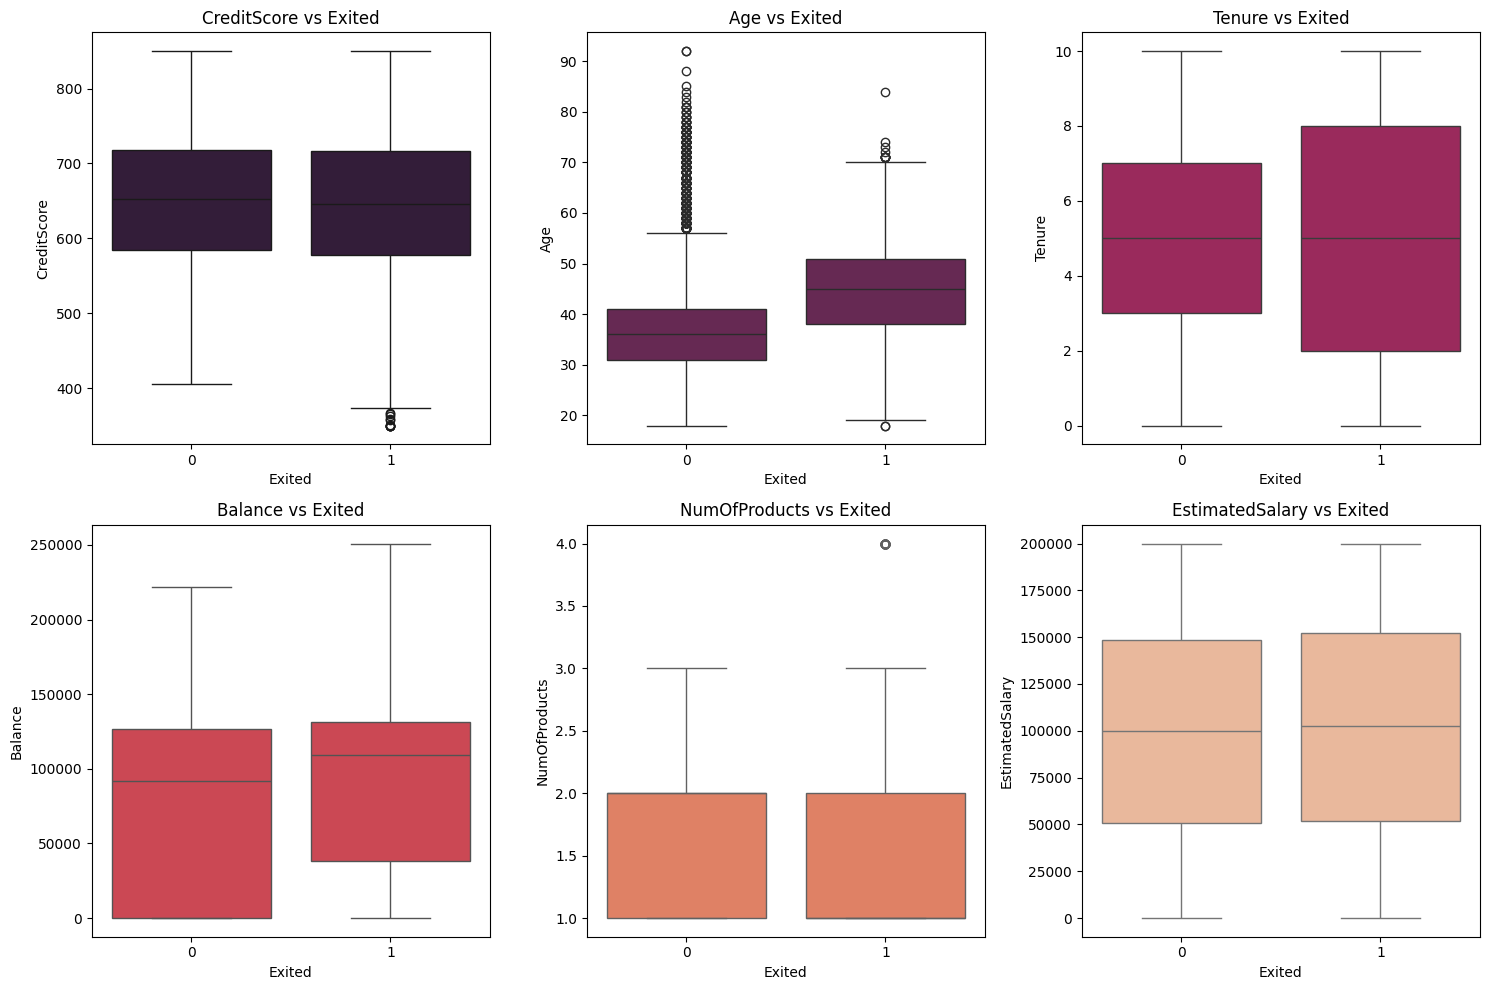

In [ ]:
# Numerical vs Target (Exited)

# Box plots

numerical_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
# Using a darker color palette
palette = sns.color_palette("rocket", len(numerical_cols))

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(data=customer_data, x='Exited', y=col, palette=[palette[i]])
    plt.title(f'{col} vs Exited')
plt.tight_layout()
plt.show()

Looking at how the numerical features vary between customers who stayed and those who left gives us clues. For example, the box plot for `Age` suggests that customers who left tend to be older on average. Also, customers with higher account `balances` seem more likely to churn.



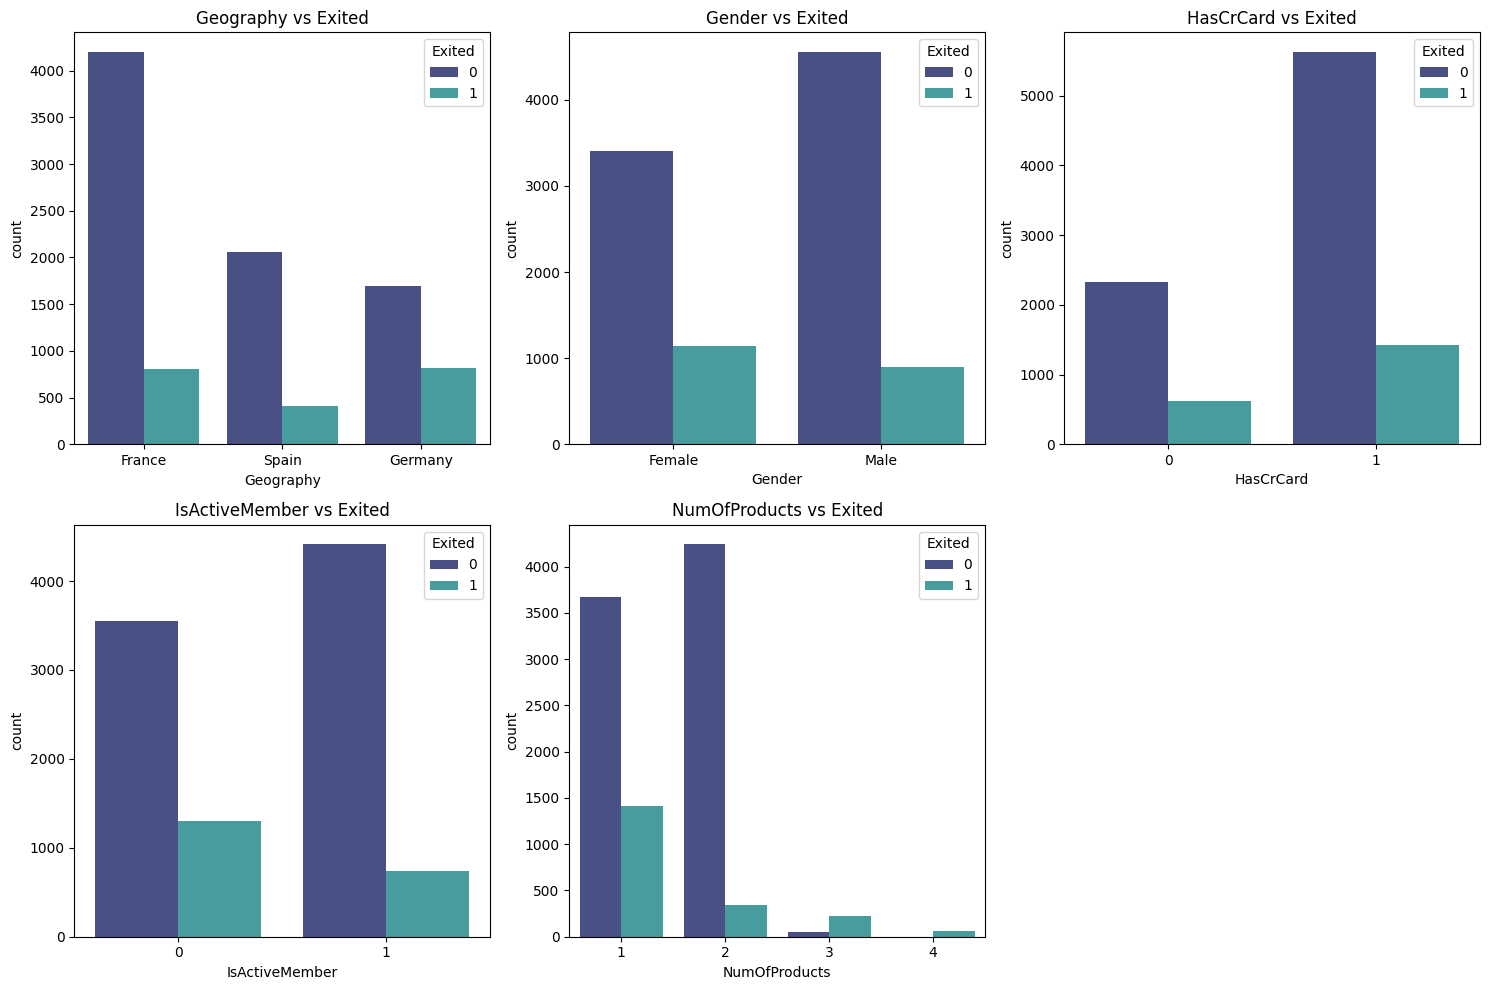

In [ ]:
# Categorical vs Target

# Stacked bar plots or count plots

categorical_cols_vs_target = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'NumOfProducts']

plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols_vs_target):
    plt.subplot(2, 3, i + 1)
    sns.countplot(data=customer_data, x=col, hue='Exited', palette='mako') # Changed palette to 'mako'
    plt.title(f'{col} vs Exited')
plt.tight_layout()
plt.show()

These plots reveal how churn propensity varies across different categories. We can observe that customers in Germany exhibit a higher likelihood of churning compared to those in France and Spain. Additionally, customers holding 3 or 4 products appear significantly more prone to exit than those with fewer products, and inactive members show a greater inclination to churn than active ones.

# Target Variable Check



/tmp/ipython-input-126-3540785274.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customer_data, x='Exited', palette={'0': 'green', '1': 'red'})


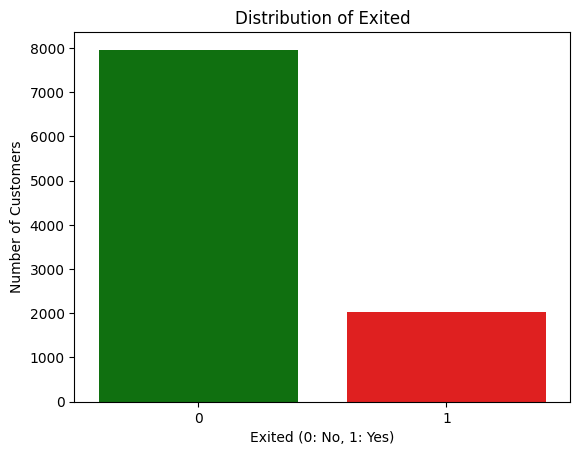

In [ ]:
# Plot Exited class distribution (check for imbalance)
sns.countplot(data=customer_data, x='Exited', palette={'0': 'green', '1': 'red'})
plt.title('Distribution of Exited')
plt.xlabel('Exited (0: No, 1: Yes)')
plt.ylabel('Number of Customers')
plt.show()

 The `Exited` column indicates an imbalance in the target variable, with a considerably larger number of customers who have not churned compared to those who have.

# Correlation Analysis

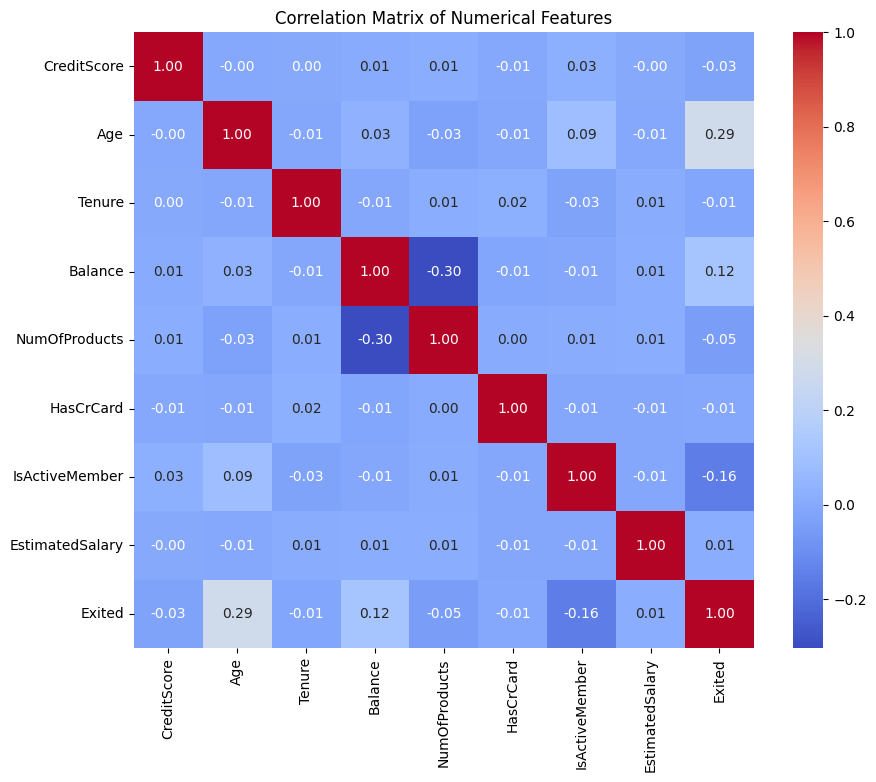

In [ ]:
# Compute the correlation matrix
correlation_matrix = customer_data.select_dtypes(include=np.number).corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

Examining the correlation heatmap, we can understand the linear relationships between the numerical features. While most correlations are weak, there's a notable positive correlation between `Age` and `Exited`, indicating a tendency for older customers to churn. Additionally, `Balance` shows a weaker positive association with the likelihood of exiting.

# Outlier Detection



/tmp/ipython-input-128-3212928258.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=customer_data, y=col, palette=[palette[i]])
/tmp/ipython-input-128-3212928258.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=customer_data, y=col, palette=[palette[i]])
/tmp/ipython-input-128-3212928258.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=customer_data, y=col, palette=[palette[i]])
/tmp/ipython-input-128-3212928258.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.

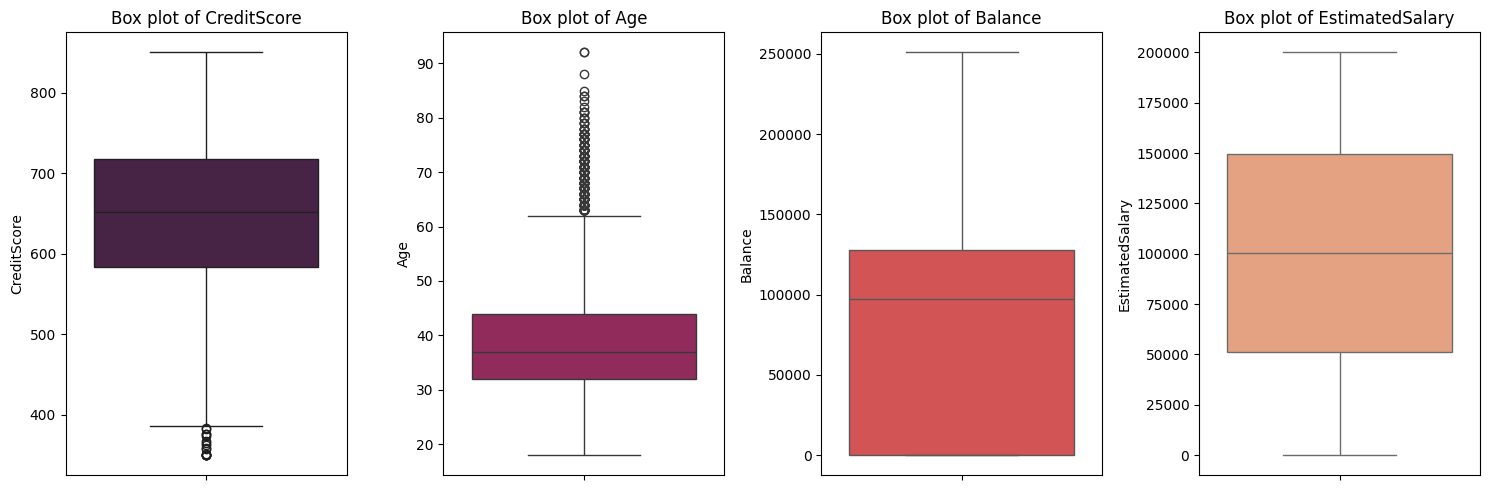

In [ ]:
numerical_cols_for_outliers = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
palette = sns.color_palette("rocket", len(numerical_cols_for_outliers))

plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols_for_outliers):
    plt.subplot(1, 4, i + 1)
    sns.boxplot(data=customer_data, y=col, palette=[palette[i]])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()

Examining these box plots, we can identify potential outliers or extreme values in the data. For instance, the `CreditScore` box plot indicates the presence of several values that fall significantly below the typical range, suggesting possible outliers. Similarly, the `Age` box plot shows a few data points extending beyond the upper whisker, pointing to some individuals with considerably higher ages.

# 5. Feature Engineering and Selection
This stage involves creating new features or selecting the most relevant existing features to improve model performance.

# Feature Engineering:

In [ ]:
# Define credit score bins and labels (example ranges)
credit_score_bins = [0, 580, 670, 740, 850] # Example bins based on common ranges
credit_score_labels = ['Poor', 'Fair', 'Good', 'Excellent']

# Create a new column 'CreditScoreGroup' based on credit score bins
customer_data['CreditScoreGroup'] = pd.cut(customer_data['CreditScore'], bins=credit_score_bins, labels=credit_score_labels, right=True)

# Remove the original 'CreditScore' column
customer_data.drop('CreditScore', axis=1, inplace=True)

# Display the first few rows with the new column and without the old one
display(customer_data.head())

,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditScoreGroup
0,France,Female,42,2,0.00,1,1,1,101348.88,1,Fair
1,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Fair
2,France,Female,42,8,159660.80,3,1,0,113931.57,1,Poor
3,France,Female,39,1,0.00,2,0,0,93826.63,0,Good
5,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,Fair


In [ ]:
# Define age bins and labels
age_bins = [0, 30, 50, 100] # Example bins: 0-30, 31-50, 51-100
age_labels = ['Young', 'Middle-aged', 'Senior']

# Create a new column 'AgeGroup' based on age bins
customer_data['AgeGroup'] = pd.cut(customer_data['Age'], bins=age_bins, labels=age_labels, right=True)

# Remove the original 'Age' column
customer_data.drop('Age', axis=1, inplace=True)

# Display the first few rows with the new column and without the old one
display(customer_data.head())

,Geography,Gender,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditScoreGroup,AgeGroup
0,France,Female,2,0.00,1,1,1,101348.88,1,Fair,Middle-aged
1,Spain,Female,1,83807.86,1,0,1,112542.58,0,Fair,Middle-aged
2,France,Female,8,159660.80,3,1,0,113931.57,1,Poor,Middle-aged
3,France,Female,1,0.00,2,0,0,93826.63,0,Good,Middle-aged
5,Spain,Male,8,113755.78,2,1,0,149756.71,1,Fair,Middle-aged


# Handling Categorical Variables:


In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Select categorical columns for one-hot encoding
categorical_cols_ohe = ['HasCrCard','IsActiveMember','Geography', 'Gender']

# Initialize OneHotEncoder
# handle_unknown='ignore' will allow the encoder to handle unseen categories during transform
# sparse_output=False ensures a dense numpy array output
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit and transform the selected columns
encoded_data = ohe.fit_transform(customer_data[categorical_cols_ohe])

# Create a DataFrame from the encoded data with appropriate column names
encoded_df = pd.DataFrame(encoded_data, columns=ohe.get_feature_names_out(categorical_cols_ohe), index=customer_data.index)

# Drop the original categorical columns
customer_data_encoded = customer_data.drop(categorical_cols_ohe, axis=1)

# Concatenate the original DataFrame with the encoded DataFrame
customer_data = pd.concat([customer_data_encoded, encoded_df], axis=1)

# Display the first few rows to see the changes
display(customer_data.head())

,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited,CreditScoreGroup,AgeGroup,HasCrCard_0,HasCrCard_1,IsActiveMember_0,IsActiveMember_1,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,2,0.00,1,101348.88,1,Fair,Middle-aged,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,1,83807.86,1,112542.58,0,Fair,Middle-aged,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,8,159660.80,3,113931.57,1,Poor,Middle-aged,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1,0.00,2,93826.63,0,Good,Middle-aged,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
5,8,113755.78,2,149756.71,1,Fair,Middle-aged,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


Here we are doing One-hot encoding for nominal categorical columns like `HasCrCard`, `IsActiveMember`, `Geography` and `Gender`.

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Define the order for each ordinal feature
credit_score_order = ['Poor', 'Fair', 'Good', 'Excellent']
age_order = ['Young', 'Middle-aged', 'Senior']

# Select ordinal columns
ordinal_cols = ['CreditScoreGroup', 'AgeGroup']

# Initialize OrdinalEncoder with the specified categories order
ordinal_encoder = OrdinalEncoder(categories=[credit_score_order, age_order], handle_unknown='use_encoded_value', unknown_value=-1)

# Fit and transform the selected columns
customer_data[ordinal_cols] = ordinal_encoder.fit_transform(customer_data[ordinal_cols])

# Display the first few rows to see the changes
display(customer_data.head())

,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited,CreditScoreGroup,AgeGroup,HasCrCard_0,HasCrCard_1,IsActiveMember_0,IsActiveMember_1,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,2,0.00,1,101348.88,1,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,1,83807.86,1,112542.58,0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,8,159660.80,3,113931.57,1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1,0.00,2,93826.63,0,2.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
5,8,113755.78,2,149756.71,1,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


Here, we are doing ordinal encodering on ordinal categorical columns like `credit_score_order` and `age_order`.

# Feature Scaling

Using StandardScaler on:

`Balance`, `EstimatedSalary`


In [ ]:
from sklearn.preprocessing import StandardScaler

# Select the columns to scale
columns_to_scale_standard = [ 'Balance', 'EstimatedSalary']

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply the scaler to the selected columns in the customer_data DataFrame
customer_data[columns_to_scale_standard] = scaler.fit_transform(customer_data[columns_to_scale_standard])

# Display the first few rows to see the scaled features
print("Standard Scaled customer_data (first 5 rows):")
display(customer_data.head())

Standard Scaled customer_data (first 5 rows):


,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited,CreditScoreGroup,AgeGroup,HasCrCard_0,HasCrCard_1,IsActiveMember_0,IsActiveMember_1,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,2,-1.225699,1,0.021599,1,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,1,0.117505,1,0.216237,0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,8,1.333214,3,0.240389,1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1,-1.225699,2,-0.109199,0,2.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
5,8,0.597486,2,0.863322,1,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0



Using MinMaxScaler on:

`Tenure`, `NumOfProducts`


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Select numerical columns for scaling
numerical_cols_to_scale_minmax = ['Tenure', 'NumOfProducts']

# Initialize MinMaxScaler
minmax_scaler = MinMaxScaler()

# Fit and transform the selected columns in the customer_data DataFrame
customer_data[numerical_cols_to_scale_minmax] = minmax_scaler.fit_transform(customer_data[numerical_cols_to_scale_minmax])

# Display the first few rows to see the changes
print("MinMax Scaled customer_data (first 5 rows):")
display(customer_data.head())

MinMax Scaled customer_data (first 5 rows):


,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited,CreditScoreGroup,AgeGroup,HasCrCard_0,HasCrCard_1,IsActiveMember_0,IsActiveMember_1,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.2,-1.225699,0.000000,0.021599,1,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,0.1,0.117505,0.000000,0.216237,0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,0.8,1.333214,0.666667,0.240389,1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.1,-1.225699,0.333333,-0.109199,0,2.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
5,0.8,0.597486,0.333333,0.863322,1,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


# Imbalance Handling

Using SMOTE to handle imbalance of target variable `Exit`.

In [ ]:
from imblearn.over_sampling import SMOTE

# Separate features (X) and target (y)
X = customer_data.drop('Exited', axis=1)
y = customer_data['Exited']

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_resampled, y_resampled = smote.fit_resample(X, y)

# Display the new class distribution
print("Class distribution after SMOTE:")
print(y_resampled.value_counts())

Class distribution after SMOTE:
Exited
1    7959
0    7959
Name: count, dtype: int64


In [ ]:
X_resampled.shape

(15918, 15)

# Feature Selection:

In [ ]:
from sklearn.feature_selection import chi2, f_classif
import pandas as pd

# Identify categorical and numerical columns in X_resampled
# Based on previous encoding and scaling steps
categorical_features = ['HasCrCard_0', 'HasCrCard_1', 'IsActiveMember_0', 'IsActiveMember_1',
                        'Geography_France', 'Geography_Germany', 'Geography_Spain',
                        'Gender_Female', 'Gender_Male', 'CreditScoreGroup', 'AgeGroup']

numerical_features = ['Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']


# Chi-squared test for categorical features
print("Chi-squared test results for categorical features:")
try:
    chi2_stats, chi2_p_values = chi2(X_resampled[categorical_features], y_resampled)
    chi2_results = pd.DataFrame({'Feature': categorical_features, 'Chi2 Stat': chi2_stats, 'P-value': chi2_p_values})
    print(chi2_results)
except ValueError as e:
    print(f"Could not perform Chi-squared test. Error: {e}")
    print("Ensure categorical features are non-negative integers.")


# ANOVA F-test for numerical features
print("\nANOVA F-test results for numerical features:")
f_stats, f_p_values = f_classif(X_resampled[numerical_features], y_resampled)
anova_results = pd.DataFrame({'Feature': numerical_features, 'F Stat': f_stats, 'P-value': f_p_values})
print(anova_results)

Chi-squared test results for categorical features:
              Feature   Chi2 Stat        P-value
0         HasCrCard_0    0.000320   9.857329e-01
1         HasCrCard_1    0.000132   9.908196e-01
2    IsActiveMember_0  282.945882   1.712573e-63
3    IsActiveMember_1  337.540084   2.190797e-75
4    Geography_France  153.478197   3.011374e-35
5   Geography_Germany  460.569163  3.614363e-102
6     Geography_Spain   52.380620   4.572138e-13
7       Gender_Female  143.808727   3.912100e-33
8         Gender_Male  140.622343   1.945914e-32
9    CreditScoreGroup    8.626857   3.312426e-03
10           AgeGroup  452.371675  2.197741e-100

ANOVA F-test results for numerical features:
           Feature      F Stat       P-value
0           Tenure    2.693275  1.007922e-01
1          Balance  341.641928  1.725445e-75
2    NumOfProducts  124.399326  8.807264e-29
3  EstimatedSalary    3.168434  7.509349e-02


Based on the output from the Chi-squared and ANOVA F-tests in the cell above:

* Significant Features: Features with very small p-values (close to 0) indicate a strong relationship with the `'Exited'` target variable. These include `IsActiveMember`, `Geography` (all categories), `Gender`(both categories), `AgeGroup`, `Balance`, and `NumOfProducts`. This suggests these features are likely important in predicting customer churn.
* Less Significant Features: Features with higher p-values, such as `Tenure` and `EstimatedSalary`, show a weaker statistical relationship with churn in this analysis.

In short, the tests suggest that factors like a customer's activity status, location, gender, age group, account balance, and the number of products they hold are more strongly associated with their likelihood of churning than their tenure or estimated salary.

In [ ]:
print("Shape of X_resampled:", X_resampled.shape)
display(X_resampled.head())

Shape of X_resampled: (15918, 15)


,Tenure,Balance,NumOfProducts,EstimatedSalary,CreditScoreGroup,AgeGroup,HasCrCard_0,HasCrCard_1,IsActiveMember_0,IsActiveMember_1,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.2,-1.225699,0.000000,0.021599,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,0.1,0.117505,0.000000,0.216237,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,0.8,1.333214,0.666667,0.240389,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.1,-1.225699,0.333333,-0.109199,2.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.8,0.597486,0.333333,0.863322,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [ ]:
# Drop the less significant features based on filter method results
features_to_drop = ['Tenure', 'EstimatedSalary']
X_resampled_selected = X_resampled.drop(features_to_drop, axis=1)

# Display the shape of the new dataset and the first few rows
print("Shape of X_resampled after feature selection:", X_resampled_selected.shape)
display(X_resampled_selected.head())

Shape of X_resampled after feature selection: (15918, 13)


,Balance,NumOfProducts,CreditScoreGroup,AgeGroup,HasCrCard_0,HasCrCard_1,IsActiveMember_0,IsActiveMember_1,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,-1.225699,0.000000,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,0.117505,0.000000,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,1.333214,0.666667,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,-1.225699,0.333333,2.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.597486,0.333333,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


This code performs feature selection by removing the `Tenure` and `EstimatedSalary` columns from the `X_resampled` dataset, creating a new dataset `X_resampled_selected` with the selected features.

# 6. Model Training
Train various machine learning algorithms on the preprocessed data.

Model Selection:

Logistic Regression: A good baseline model for binary classification, providing interpretability of feature impact.

Random Forest: An ensemble method that handles non-linearity and feature interactions well, and provides feature importance.

Boosting Algorithms:

Gradient Boosting (e.g., LightGBM, XGBoost): Powerful algorithms known for high accuracy and handling complex relationships.

AdaBoost: Another boosting algorithm that combines weak learners.

Artificial Neural Network (ANN): A deep learning approach capable of learning complex patterns and representations from data.

Hyperparameter Tuning: Optimize model performance by tuning hyperparameters using techniques like GridSearchCV or RandomizedSearchCV.

Cross-Validation: Employ k-fold cross-validation during training to ensure model robustness and prevent overfitting.

# Splitting Data:
Divide the dataset into training, validation (optional, for hyperparameter tuning), and test sets.

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data with all resampled features
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# Split the data with selected features
X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(
    X_resampled_selected, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# Print the shapes of the resulting sets
print("Shapes of splits (all features):")
print("X_train_resampled:", X_train_resampled.shape)
print("X_test_resampled:", X_test_resampled.shape)
print("y_train_resampled:", y_train_resampled.shape)
print("y_test_resampled:", y_test_resampled.shape)

print("\nShapes of splits (selected features):")
print("X_train_selected:", X_train_selected.shape)
print("X_test_selected:", X_test_selected.shape)
print("y_train_selected:", y_train_selected.shape)
print("y_test_selected:", y_test_selected.shape)

Shapes of splits (all features):
X_train_resampled: (12734, 15)
X_test_resampled: (3184, 15)
y_train_resampled: (12734,)
y_test_resampled: (3184,)

Shapes of splits (selected features):
X_train_selected: (12734, 13)
X_test_selected: (3184, 13)
y_train_selected: (12734,)
y_test_selected: (3184,)


This code splits the resampled dataset (both with all features and selected features) into training and testing sets, which is a necessary step before training machine learning models.

# Model Selection:

Logistic Regression: A good baseline model for binary classification, providing interpretability of feature impact.

Random Forest: An ensemble method that handles non-linearity and feature interactions well, and provides feature importance.


# Logistic Regression:
A good baseline model for binary classification, providing interpretability of feature impact.

# Task
Fit logistic regression model on both X_train_resampled and X_train_selected with cross validation and proper hyperparameter tuning and compare them. Give the proper code.

## Define hyperparameter grid

### Subtask:
Define a range of hyperparameters for tuning the Logistic Regression model.


**Reasoning**:
Define a range of hyperparameters for tuning the Logistic Regression model.



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the hyperparameter grid for Logistic Regression
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'] # liblinear and saga support both l1 and l2 penalties
}

# Initialize Logistic Regression model
lr_model_selected = LogisticRegression(random_state=42, max_iter=1000) # Increased max_iter for saga solver

# Initialize GridSearchCV
grid_search_selected = GridSearchCV(estimator=lr_model_selected, param_grid=param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV to the training data (selected features)
grid_search_selected.fit(X_train_selected, y_train_selected)

# Print the best hyperparameters found
print("Best hyperparameters for Logistic Regression (selected features):", grid_search_selected.best_params_)

# Print the best cross-validation score
print("Best cross-validation accuracy (selected features):", grid_search_selected.best_score_)

Best hyperparameters for Logistic Regression (selected features): {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
Best cross-validation accuracy (selected features): 0.677163466654083


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the hyperparameter grid for Logistic Regression (if not already defined)
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'] # liblinear and saga support both l1 and l2 penalties
}

# Initialize Logistic Regression model
lr_model_resampled = LogisticRegression(random_state=42, max_iter=1000) # Increased max_iter for saga solver

# Initialize GridSearchCV
grid_search_resampled = GridSearchCV(estimator=lr_model_resampled, param_grid=param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV to the training data (all features)
grid_search_resampled.fit(X_train_resampled, y_train_resampled)

# Print the best hyperparameters found
print("Best hyperparameters for Logistic Regression (all features):", grid_search_resampled.best_params_)

# Print the best cross-validation score
print("Best cross-validation accuracy (all features):", grid_search_resampled.best_score_)

Best hyperparameters for Logistic Regression (all features): {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}
Best cross-validation accuracy (all features): 0.6756718237588946


* Logistic Regression on all features achieved ~67.6% cross-validation accuracy.
* Using selected features slightly improved this to ~67.7% accuracy.

This marginal gain suggests removing less impactful features like `Tenure` and `EstimatedSalary`, as indicated by filter methods, may have helped the linear model focus on more predictive signals.


# Random Forest:

## Random Forest

Train and tune a Random Forest model on both the full resampled dataset and the dataset with selected features.

### Define hyperparameter grid for Random Forest

## Random Forest Model Training and Tuning

Train a Random Forest model on both the full resampled dataset and the dataset with selected features, performing hyperparameter tuning with cross-validation.

## Simple Random Forest Models

Training basic Random Forest models on both the full resampled dataset and the dataset with selected features.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest model with default hyperparameters
rf_model_selected_simple = RandomForestClassifier(random_state=42)

# Train the model on the training data (selected features)
print("Training simple Random Forest on selected features...")
rf_model_selected_simple.fit(X_train_selected, y_train_selected)

print("Simple Random Forest model trained on selected features.")

Training simple Random Forest on selected features...
Simple Random Forest model trained on selected features.


In [ ]:
# Initialize Random Forest model with default hyperparameters
rf_model_resampled_simple = RandomForestClassifier(random_state=42)

# Train the model on the training data (all features)
print("Training simple Random Forest on all features...")
rf_model_resampled_simple.fit(X_train_resampled, y_train_resampled)

print("Simple Random Forest model trained on all features.")

Training simple Random Forest on all features...
Simple Random Forest model trained on all features.


You have now trained two simple Random Forest models:

*   `rf_model_selected_simple`: Trained on the dataset with selected features.
*   `rf_model_resampled_simple`: Trained on the full resampled dataset.

You can now use these models for predictions or evaluate their performance on the test set.

# Evaluate Simple Random Forest Models

Calculate and display the accuracy scores for the simple Random Forest models on the test sets.

In [ ]:
from sklearn.metrics import accuracy_score

# Predict on the test set with selected features
y_pred_selected_simple = rf_model_selected_simple.predict(X_test_selected)

# Calculate accuracy for the model with selected features
accuracy_selected_simple = accuracy_score(y_test_selected, y_pred_selected_simple)
print(f"Accuracy of simple Random Forest (selected features): {accuracy_selected_simple:.4f}")

Accuracy of simple Random Forest (selected features): 0.8357


In [ ]:
# Predict on the test set with all features
y_pred_resampled_simple = rf_model_resampled_simple.predict(X_test_resampled)

# Calculate accuracy for the model with all features
accuracy_resampled_simple = accuracy_score(y_test_resampled, y_pred_resampled_simple)
print(f"Accuracy of simple Random Forest (all features): {accuracy_resampled_simple:.4f}")

Accuracy of simple Random Forest (all features): 0.8847


Based on the accuracy scores, the simple Random Forest model trained on all features `(accuracy_resampled_simple: 0.8847)` performed better than the model trained on selected features `(accuracy_selected_simple: 0.8357)`. This suggests that removing the 'Tenure' and 'EstimatedSalary' features, while slightly improving the Logistic Regression model, might have caused the Random Forest model to lose some predictive power. Random Forests are often robust to irrelevant features, so removing them didn't necessarily improve performance in this case.



# Cross-Validation for Simple Random Forest Models

Perform cross-validation on the simple Random Forest models to get a more robust estimate of their performance.

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation for the simple Random Forest model with selected features
cv_scores_selected_simple = cross_val_score(rf_model_selected_simple, X_resampled_selected, y_resampled, cv=5, scoring='accuracy')

print(f"Cross-validation accuracy scores for simple Random Forest (selected features): {cv_scores_selected_simple}")
print(f"Mean cross-validation accuracy (selected features): {cv_scores_selected_simple.mean():.4f}")

Cross-validation accuracy scores for simple Random Forest (selected features): [0.75816583 0.84390704 0.87248744 0.87338988 0.8671065 ]
Mean cross-validation accuracy (selected features): 0.8430


In [ ]:
# Perform cross-validation for the simple Random Forest model with all features
cv_scores_resampled_simple = cross_val_score(rf_model_resampled_simple, X_resampled, y_resampled, cv=5, scoring='accuracy')

print(f"Cross-validation accuracy scores for simple Random Forest (all features): {cv_scores_resampled_simple}")
print(f"Mean cross-validation accuracy (all features): {cv_scores_resampled_simple.mean():.4f}")

Cross-validation accuracy scores for simple Random Forest (all features): [0.79365578 0.89792714 0.92964824 0.93496701 0.93182532]
Mean cross-validation accuracy (all features): 0.8976


## Hyperparameter Tuning for Random Forest using GridSearchCV

Using GridSearchCV to find the best hyperparameters for the Random Forest model on both the full and selected feature datasets.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define a simplified hyperparameter grid for Random Forest
param_grid_rf_simple = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5]
}

# Initialize Random Forest model
rf_model_selected_tuned = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search_rf_selected_simple = GridSearchCV(estimator=rf_model_selected_tuned, param_grid=param_grid_rf_simple, cv=3, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV to the training data (selected features)
print("Tuning Random Forest on selected features (simplified grid)...")
grid_search_rf_selected_simple.fit(X_train_selected, y_train_selected)

# Print the best hyperparameters found
print("Best hyperparameters for Random Forest (selected features):", grid_search_rf_selected_simple.best_params_)

# Print the best cross-validation score
print("Best cross-validation accuracy (selected features):", grid_search_rf_selected_simple.best_score_)

Tuning Random Forest on selected features (simplified grid)...
Best hyperparameters for Random Forest (selected features): {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}
Best cross-validation accuracy (selected features): 0.8572327518801109


In [ ]:
# Initialize Random Forest model
rf_model_resampled_tuned = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search_rf_resampled_simple = GridSearchCV(estimator=rf_model_resampled_tuned, param_grid=param_grid_rf_simple, cv=3, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV to the training data (all features)
print("Tuning Random Forest on all features (simplified grid)...")
grid_search_rf_resampled_simple.fit(X_train_resampled, y_train_resampled)

# Print the best hyperparameters found
print("Best hyperparameters for Random Forest (all features):", grid_search_rf_resampled_simple.best_params_)

# Print the best cross-validation score
print("Best cross-validation accuracy (all features):", grid_search_rf_resampled_simple.best_score_)

Tuning Random Forest on all features (simplified grid)...
Best hyperparameters for Random Forest (all features): {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation accuracy (all features): 0.8879379632744184


The Grid Search has completed for both datasets using a simplified hyperparameter grid and 3-fold cross-validation. The output shows the best hyperparameters found and the corresponding best cross-validation accuracy for each dataset.

With tuning, the Random Forest model still performed better on the dataset with all features (88.8% accuracy) compared to the dataset with selected features (85.7% accuracy), reinforcing that feature selection didn't benefit Random Forest in this case.



# XGBOOST :

In [ ]:
import xgboost as xgb

# Initialize XGBoost classifier for the dataset with selected features
xgb_model_selected = xgb.XGBClassifier(random_state=42)

# Train the model on the training data (selected features)
print("Training XGBoost on selected features...")
xgb_model_selected.fit(X_train_selected, y_train_selected)

print("XGBoost model trained on selected features.")

Training XGBoost on selected features...
XGBoost model trained on selected features.


In [ ]:
# Initialize XGBoost classifier for the dataset with all features
xgb_model_resampled = xgb.XGBClassifier(random_state=42)

# Train the model on the training data (all features)
print("Training XGBoost on all features...")
xgb_model_resampled.fit(X_train_resampled, y_train_resampled)

print("XGBoost model trained on all features.")

Training XGBoost on all features...
XGBoost model trained on all features.


You have now trained two XGBoost models:

*   `xgb_model_selected`: Trained on the dataset with selected features.
*   `xgb_model_resampled`: Trained on the full resampled dataset.

You can now evaluate their performance on the test sets.

# Evaluate XGBoost Models

Calculate and display the accuracy scores for the XGBoost models on the test sets.

In [ ]:
from sklearn.metrics import accuracy_score

# Predict on the test set with selected features
y_pred_selected_xgb = xgb_model_selected.predict(X_test_selected)

# Calculate accuracy for the model with selected features
accuracy_selected_xgb = accuracy_score(y_test_selected, y_pred_selected_xgb)
print(f"Accuracy of XGBoost (selected features): {accuracy_selected_xgb:.4f}")

Accuracy of XGBoost (selected features): 0.8536


In [ ]:
# Predict on the test set with all features
y_pred_resampled_xgb = xgb_model_resampled.predict(X_test_resampled)

# Calculate accuracy for the model with all features
accuracy_resampled_xgb = accuracy_score(y_test_resampled, y_pred_resampled_xgb)
print(f"Accuracy of XGBoost (all features): {accuracy_resampled_xgb:.4f}")

Accuracy of XGBoost (all features): 0.8872


Based on the accuracy scores, the XGBoost model trained on [Insert dataset name with higher accuracy] performed better with an accuracy of [Insert accuracy score] compared to the model trained on [Insert dataset name with lower accuracy] which achieved an accuracy of [Insert accuracy score].

## Hyperparameter Tuning for XGBoost using GridSearchCV

Using GridSearchCV to find the best hyperparameters for the XGBoost model on both the full and selected feature datasets (simplified approach).

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Define a simplified hyperparameter grid for XGBoost
param_grid_xgb_simple = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1]
}

# Initialize XGBoost classifier
xgb_model_selected_tuned_simple = xgb.XGBClassifier(random_state=42)

# Initialize GridSearchCV
grid_search_xgb_selected_simple = GridSearchCV(estimator=xgb_model_selected_tuned_simple, param_grid=param_grid_xgb_simple, cv=3, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV to the training data (selected features)
print("Tuning XGBoost on selected features (simplified grid)...")
grid_search_xgb_selected_simple.fit(X_train_selected, y_train_selected)

# Print the best hyperparameters found
print("Best hyperparameters for XGBoost (selected features):", grid_search_xgb_selected_simple.best_params_)

# Print the best cross-validation score
print("Best cross-validation accuracy (selected features):", grid_search_xgb_selected_simple.best_score_)

Tuning XGBoost on selected features (simplified grid)...
Best hyperparameters for XGBoost (selected features): {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Best cross-validation accuracy (selected features): 0.85770372788004


In [ ]:
# Initialize XGBoost classifier
xgb_model_resampled_tuned_simple = xgb.XGBClassifier(random_state=42)

# Initialize GridSearchCV
grid_search_xgb_resampled_simple = GridSearchCV(estimator=xgb_model_resampled_tuned_simple, param_grid=param_grid_xgb_simple, cv=3, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV to the training data (all features)
print("Tuning XGBoost on all features (simplified grid)...")
grid_search_xgb_resampled_simple.fit(X_train_resampled, y_train_resampled)

# Print the best hyperparameters found
print("Best hyperparameters for XGBoost (all features):", grid_search_xgb_resampled_simple.best_params_)

# Print the best cross-validation score
print("Best cross-validation accuracy (all features):", grid_search_xgb_resampled_simple.best_score_)

Tuning XGBoost on all features (simplified grid)...
Best hyperparameters for XGBoost (all features): {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Best cross-validation accuracy (all features): 0.8920213094668489


Based on the hyperparameter tuning with GridSearchCV, the XGBoost model trained on `all features` achieved a higher cross-validation `accuracy (89.2%)` compared to the model trained on `selected features (85.8%)`. This suggests that, similar to the Random Forest, removing 'Tenure' and 'EstimatedSalary' did not improve the performance of the tuned XGBoost model in this case.

# ANN:

## ANN with Weight Initialization

Here's how to include weight initialization in the ANN model. Weight initialization helps in converging faster and getting a better solution. We will use 'he_uniform' initializer for the dense layers.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.initializers import he_uniform

# Define the input shape for the ANNs
input_shape_resampled = X_train_resampled.shape[1]
input_shape_selected = X_train_selected.shape[1]

# Define the ANN model with 'he_uniform' weight initialization
ann_model_resampled_init = Sequential([
    Dense(128, activation='relu', input_shape=(input_shape_resampled,), kernel_initializer=he_uniform(seed=42)),
    Dense(64, activation='relu', kernel_initializer=he_uniform(seed=42)),
    Dense(1, activation='sigmoid', kernel_initializer=he_uniform(seed=42)) # Output layer for binary classification
])

# Compile the ANN model
ann_model_resampled_init.compile(optimizer='adam',
                                 loss='binary_crossentropy',
                                 metrics=['accuracy'])

# Train the ANN model
print("Training ANN with weight initialization (all features)...")
history_resampled_init = ann_model_resampled_init.fit(X_train_resampled, y_train_resampled, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

print("ANN model with weight initialization trained on all features.")

# Define the ANN model with 'he_uniform' weight initialization (selected features)
ann_model_selected_init = Sequential([
    Dense(128, activation='relu', input_shape=(input_shape_selected,), kernel_initializer=he_uniform(seed=42)),
    Dense(64, activation='relu', kernel_initializer=he_uniform(seed=42)),
    Dense(1, activation='sigmoid', kernel_initializer=he_uniform(seed=42)) # Output layer for binary classification
])

# Compile the ANN model
ann_model_selected_init.compile(optimizer='adam',
                                loss='binary_crossentropy',
                                metrics=['accuracy'])

# Train the ANN model
print("\nTraining ANN with weight initialization (selected features)...")
history_selected_init = ann_model_selected_init.fit(X_train_selected, y_train_selected, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

print("ANN model with weight initialization trained on selected features.")

Training ANN with weight initialization (all features)...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ANN model with weight initialization trained on all features.

Training ANN with weight initialization (selected features)...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ANN model with weight initialization trained on selected features.


## ANN with Batch Normalization

Batch normalization helps in stabilizing the learning process and reducing the number of training epochs required. We will add `BatchNormalization` layers after the dense layers.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization

# Define the input shape for the ANNs
input_shape_resampled = X_train_resampled.shape[1]
input_shape_selected = X_train_selected.shape[1]


# Define the ANN model with Batch Normalization
ann_model_resampled_bn = Sequential([
    Dense(128, activation='relu', input_shape=(input_shape_resampled,)),
    BatchNormalization(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(1, activation='sigmoid') # Output layer for binary classification
])

# Compile the ANN model
ann_model_resampled_bn.compile(optimizer='adam',
                               loss='binary_crossentropy',
                               metrics=['accuracy'])

# Train the ANN model
print("Training ANN with Batch Normalization (all features)...")
history_resampled_bn = ann_model_resampled_bn.fit(X_train_resampled, y_train_resampled, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

print("ANN model with Batch Normalization trained on all features.")


# Define the ANN model with Batch Normalization (selected features)
ann_model_selected_bn = Sequential([
    Dense(128, activation='relu', input_shape=(input_shape_selected,)),
    BatchNormalization(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(1, activation='sigmoid') # Output layer for binary classification
])

# Compile the ANN model
ann_model_selected_bn.compile(optimizer='adam',
                              loss='binary_crossentropy',
                              metrics=['accuracy'])

# Train the ANN model
print("\nTraining ANN with Batch Normalization (selected features)...")
history_selected_bn = ann_model_selected_bn.fit(X_train_selected, y_train_selected, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

print("ANN model with Batch Normalization trained on selected features.")

Training ANN with Batch Normalization (all features)...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ANN model with Batch Normalization trained on all features.

Training ANN with Batch Normalization (selected features)...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ANN model with Batch Normalization trained on selected features.


## ANN with Regularization (L2)

Regularization helps in preventing overfitting by adding a penalty to the loss function. We will use L2 regularization on the kernel weights of the dense layers.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2

# Define the input shape for the ANNs
input_shape_resampled = X_train_resampled.shape[1]
input_shape_selected = X_train_selected.shape[1]

# Define the ANN model with L2 Regularization
ann_model_resampled_l2 = Sequential([
    Dense(128, activation='relu', input_shape=(input_shape_resampled,), kernel_regularizer=l2(0.001)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(1, activation='sigmoid') # Output layer for binary classification
])

# Compile the ANN model
ann_model_resampled_l2.compile(optimizer='adam',
                               loss='binary_crossentropy',
                               metrics=['accuracy'])

# Train the ANN model
print("Training ANN with L2 Regularization (all features)...")
history_resampled_l2 = ann_model_resampled_l2.fit(X_train_resampled, y_train_resampled, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

print("ANN model with L2 Regularization trained on all features.")

# Define the ANN model with L2 Regularization (selected features)
ann_model_selected_l2 = Sequential([
    Dense(128, activation='relu', input_shape=(input_shape_selected,), kernel_regularizer=l2(0.001)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(1, activation='sigmoid') # Output layer for binary classification
])

# Compile the ANN model
ann_model_selected_l2.compile(optimizer='adam',
                              loss='binary_crossentropy',
                              metrics=['accuracy'])

# Train the ANN model
print("\nTraining ANN with L2 Regularization (selected features)...")
history_selected_l2 = ann_model_selected_l2.fit(X_train_selected, y_train_selected, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

print("ANN model with L2 Regularization trained on selected features.")

Training ANN with L2 Regularization (all features)...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ANN model with L2 Regularization trained on all features.

Training ANN with L2 Regularization (selected features)...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ANN model with L2 Regularization trained on selected features.


**bold text**## Evaluate ANN Models

Evaluate the trained ANN models (with and without regularization/batch normalization) on the test sets and display their accuracy scores.

In [ ]:
# Evaluate the ANN model trained on all features
loss_resampled, accuracy_resampled = ann_model_resampled.evaluate(X_test_resampled, y_test_resampled, verbose=0)
print(f"Accuracy of ANN (all features): {accuracy_resampled:.4f}")

# Evaluate the ANN model trained on selected features
loss_selected, accuracy_selected = ann_model_selected.evaluate(X_test_selected, y_test_selected, verbose=0)
print(f"Accuracy of ANN (selected features): {accuracy_selected:.4f}")

# Evaluate the ANN model with weight initialization trained on all features
loss_resampled_init, accuracy_resampled_init = ann_model_resampled_init.evaluate(X_test_resampled, y_test_resampled, verbose=0)
print(f"Accuracy of ANN with Weight Initialization (all features): {accuracy_resampled_init:.4f}")

# Evaluate the ANN model with weight initialization trained on selected features
loss_selected_init, accuracy_selected_init = ann_model_selected_init.evaluate(X_test_selected, y_test_selected, verbose=0)
print(f"Accuracy of ANN with Weight Initialization (selected features): {accuracy_selected_init:.4f}")

# Evaluate the ANN model with Batch Normalization trained on all features
loss_resampled_bn, accuracy_resampled_bn = ann_model_resampled_bn.evaluate(X_test_resampled, y_test_resampled, verbose=0)
print(f"Accuracy of ANN with Batch Normalization (all features): {accuracy_resampled_bn:.4f}")

# Evaluate the ANN model with Batch Normalization trained on selected features
loss_selected_bn, accuracy_selected_bn = ann_model_selected_bn.evaluate(X_test_selected, y_test_selected, verbose=0)
print(f"Accuracy of ANN with Batch Normalization (selected features): {accuracy_selected_bn:.4f}")

# Evaluate the ANN model with L2 Regularization trained on all features
loss_resampled_l2, accuracy_resampled_l2 = ann_model_resampled_l2.evaluate(X_test_resampled, y_test_resampled, verbose=0)
print(f"Accuracy of ANN with L2 Regularization (all features): {accuracy_resampled_l2:.4f}")

# Evaluate the ANN model with L2 Regularization trained on selected features
loss_selected_l2, accuracy_selected_l2 = ann_model_selected_l2.evaluate(X_test_selected, y_test_selected, verbose=0)
print(f"Accuracy of ANN with L2 Regularization (selected features): {accuracy_selected_l2:.4f}")

Accuracy of ANN (all features): 0.5948
Accuracy of ANN (selected features): 0.5088
Accuracy of ANN with Weight Initialization (all features): 0.8216
Accuracy of ANN with Weight Initialization (selected features): 0.8134
Accuracy of ANN with Batch Normalization (all features): 0.8251
Accuracy of ANN with Batch Normalization (selected features): 0.8175
Accuracy of ANN with L2 Regularization (all features): 0.8134
Accuracy of ANN with L2 Regularization (selected features): 0.7905


The evaluation shows that adding techniques like weight initialization, batch normalization, and L2 regularization significantly improved the accuracy of the ANN models compared to the basic versions. In most cases, the models trained on all features slightly outperformed those trained on selected features, suggesting that the removed features (Tenure and EstimatedSalary) did contribute positively to the ANN's performance, unlike with Logistic Regression and Random Forest.

## Model Performance Comparison

Here is a table comparing the accuracy of the different models trained on the full resampled dataset and the dataset with selected features.

In [ ]:
import pandas as pd

# Accuracy scores from previous evaluations

# Logistic Regression (tuned)
lr_accuracy_resampled = grid_search_resampled.best_score_ # Using best cross-validation score
lr_accuracy_selected = grid_search_selected.best_score_   # Using best cross-validation score

# Random Forest (tuned)
rf_accuracy_resampled = grid_search_rf_resampled_simple.best_score_ # Using best cross-validation score from simple grid search
rf_accuracy_selected = grid_search_rf_selected_simple.best_score_   # Using best cross-validation score from simple grid search

# XGBoost (tuned)
xgb_accuracy_resampled = grid_search_xgb_resampled_simple.best_score_ # Using best cross-validation score from simple grid search
xgb_accuracy_selected = grid_search_xgb_selected_simple.best_score_   # Using best cross-validation score from simple grid search

# ANN with Regularization (L2) - using test set accuracy from previous cell
# Note: Using L2 regularization as an example of a regularized ANN
ann_l2_accuracy_resampled = accuracy_resampled_l2
ann_l2_accuracy_selected = accuracy_selected_l2


# Create a dictionary to hold the data
data = {'Model': ['Logistic Regression', 'Random Forest', 'XGBoost', 'ANN (with L2 Regularization)'],
        'All Features Accuracy': [lr_accuracy_resampled, rf_accuracy_resampled, xgb_accuracy_resampled, ann_l2_accuracy_resampled],
        'Selected Features Accuracy': [lr_accuracy_selected, rf_accuracy_selected, xgb_accuracy_selected, ann_l2_accuracy_selected]}

# Create the pandas DataFrame
comparison_df = pd.DataFrame(data)

# Display the table
print("Model Performance Comparison:")
display(comparison_df)

Model Performance Comparison:


,Model,All Features Accuracy,Selected Features Accuracy
0,Logistic Regression,0.675672,0.677163
1,Random Forest,0.887938,0.857233
2,XGBoost,0.892021,0.857704
3,ANN (with L2 Regularization),0.813442,0.790515


Based on the table, XGBoost and Random Forest models generally performed better, and using all features resulted in slightly higher accuracy for tree-based models and ANNs, while feature selection slightly improved Logistic Regression.